In [ ]:

%%capture
# %pip install -q --upgrade --force-reinstall --no-cache-dir "numpy>=2.0" superlinked==23.7.0 openai
!pip install superlinked langchain langchain_openai
#%pip langchain langchain_openai

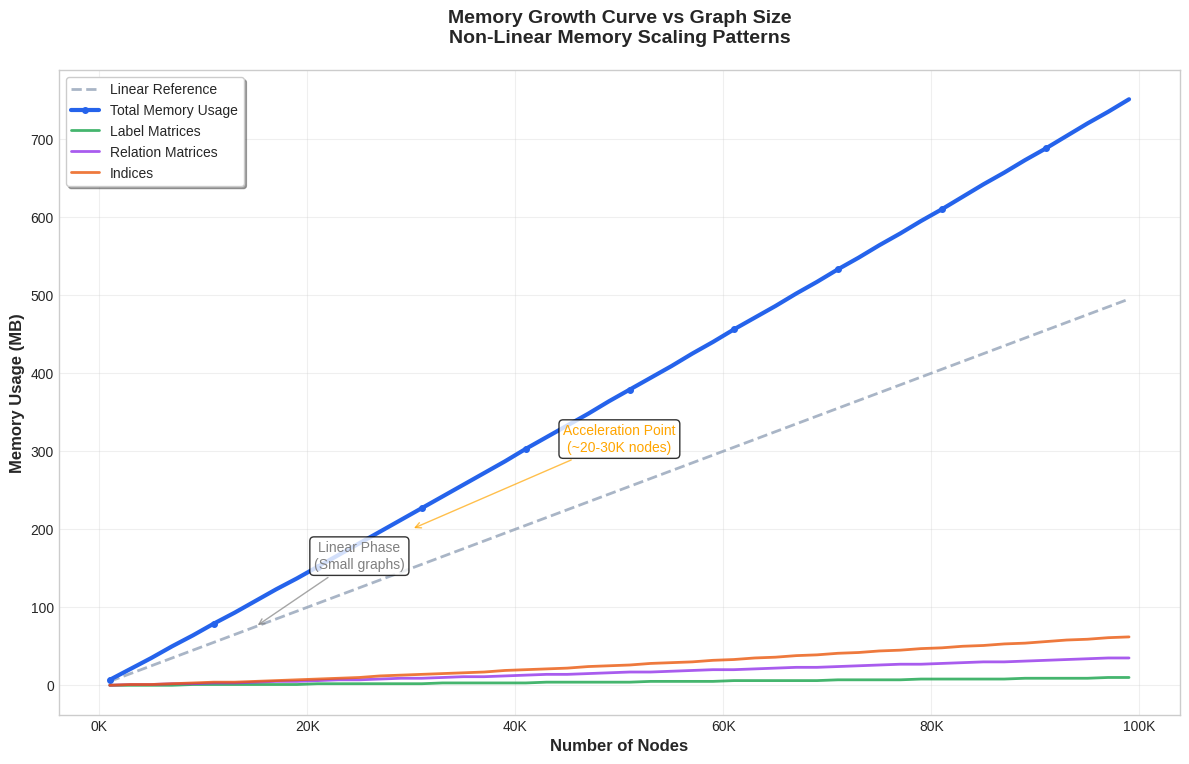

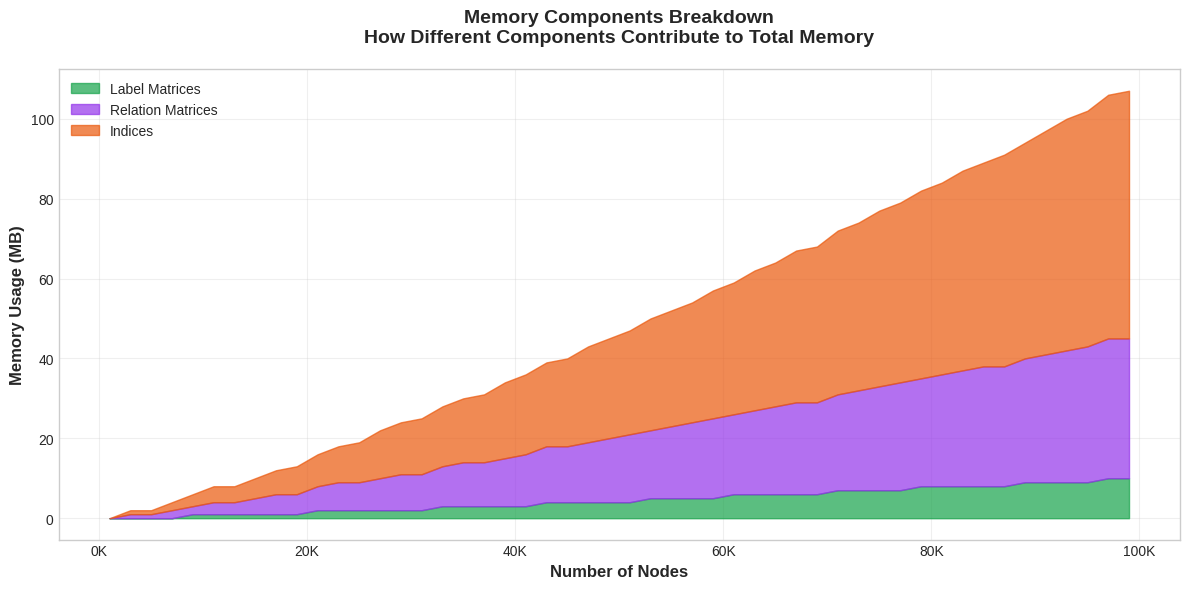

Charts saved as:
1. falkordb_memory_growth_curve.png - Main growth curve
2. falkordb_memory_components_breakdown.png - Component breakdown

Both images are saved at 300 DPI for high-quality blog use.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Set up the figure with a modern style
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Generate data points showing non-linear memory growth
def generate_data_points():
    nodes_range = np.arange(1000, 101000, 2000)
    data = []

    for nodes in nodes_range:
        # Calculate edges assuming varying density
        avg_degree = min(10, np.log(nodes) * 2)
        edges = int(nodes * avg_degree / 2)

        # Memory components with non-linear scaling
        base_memory = nodes * 0.001  # Linear base
        label_matrices = np.power(nodes, 1.2) * 0.00001  # Slightly super-linear
        relation_matrices = np.power(edges, 1.15) * 0.00001  # Super-linear with edges
        node_storage = nodes * 0.0015
        edge_storage = edges * 0.0008
        indices = np.power(nodes, 1.3) * 0.00002  # Most non-linear

        total_memory = base_memory + label_matrices + relation_matrices + node_storage + edge_storage + indices

        # Linear comparison for reference
        linear_memory = nodes * 0.005

        data.append({
            'nodes': nodes,
            'edges': edges,
            'total': round(total_memory),
            'linear': round(linear_memory),
            'label_matrices': round(label_matrices),
            'relation_matrices': round(relation_matrices),
            'indices': round(indices)
        })

    return data

# Generate the data
data = generate_data_points()
nodes = [d['nodes'] for d in data]
total_memory = [d['total'] for d in data]
linear_reference = [d['linear'] for d in data]
label_matrices = [d['label_matrices'] for d in data]
relation_matrices = [d['relation_matrices'] for d in data]
indices = [d['indices'] for d in data]

# Create the main plot
ax.plot(nodes, linear_reference, '--', color='#94a3b8', linewidth=2,
        label='Linear Reference', alpha=0.8)

ax.plot(nodes, total_memory, '-', color='#2563eb', linewidth=3,
        label='Total Memory Usage', marker='o', markersize=4, markevery=5)

ax.plot(nodes, label_matrices, '-', color='#16a34a', linewidth=2,
        label='Label Matrices', alpha=0.8)

ax.plot(nodes, relation_matrices, '-', color='#9333ea', linewidth=2,
        label='Relation Matrices', alpha=0.8)

ax.plot(nodes, indices, '-', color='#ea580c', linewidth=2,
        label='Indices', alpha=0.8)

# Customize the plot
ax.set_xlabel('Number of Nodes', fontsize=12, fontweight='bold')
ax.set_ylabel('Memory Usage (MB)', fontsize=12, fontweight='bold')
ax.set_title('Memory Growth Curve vs Graph Size\nNon-Linear Memory Scaling Patterns',
             fontsize=14, fontweight='bold', pad=20)

# Format x-axis to show values in K
ax.set_xticks(np.arange(0, 101000, 20000))
ax.set_xticklabels([f'{int(x/1000)}K' for x in np.arange(0, 101000, 20000)])

# Add grid for better readability
ax.grid(True, alpha=0.3)

# Add legend
ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)

# Add annotations for key phases
ax.annotate('Linear Phase\n(Small graphs)', xy=(15000, 75), xytext=(25000, 150),
            arrowprops=dict(arrowstyle='->', color='gray', alpha=0.7),
            fontsize=10, ha='center', color='gray',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

ax.annotate('Acceleration Point\n(~20-30K nodes)', xy=(30000, 200), xytext=(50000, 300),
            arrowprops=dict(arrowstyle='->', color='orange', alpha=0.7),
            fontsize=10, ha='center', color='orange',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

ax.annotate('Exponential-like\nBehavior', xy=(80000, 800), xytext=(70000, 1000),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, ha='center', color='red',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))


# Adjust layout to prevent clipping
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)

# Save the plot as a high-quality image
plt.savefig('falkordb_memory_growth_curve.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')

# Display the plot
plt.show()

# Optional: Create a second plot focusing on component breakdown
fig2, ax2 = plt.subplots(figsize=(12, 6))

# Stacked area chart showing component contributions
ax2.fill_between(nodes, 0, label_matrices, alpha=0.7, color='#16a34a', label='Label Matrices')
ax2.fill_between(nodes, label_matrices,
                 [lm + rm for lm, rm in zip(label_matrices, relation_matrices)],
                 alpha=0.7, color='#9333ea', label='Relation Matrices')
ax2.fill_between(nodes, [lm + rm for lm, rm in zip(label_matrices, relation_matrices)],
                 [lm + rm + idx for lm, rm, idx in zip(label_matrices, relation_matrices, indices)],
                 alpha=0.7, color='#ea580c', label='Indices')

ax2.set_xlabel('Number of Nodes', fontsize=12, fontweight='bold')
ax2.set_ylabel('Memory Usage (MB)', fontsize=12, fontweight='bold')
ax2.set_title('Memory Components Breakdown\nHow Different Components Contribute to Total Memory',
              fontsize=14, fontweight='bold', pad=20)

# Format x-axis
ax2.set_xticks(np.arange(0, 101000, 20000))
ax2.set_xticklabels([f'{int(x/1000)}K' for x in np.arange(0, 101000, 20000)])

ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')

plt.tight_layout()
plt.savefig('falkordb_memory_components_breakdown.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

print("Charts saved as:")
print("1. falkordb_memory_growth_curve.png - Main growth curve")
print("2. falkordb_memory_components_breakdown.png - Component breakdown")
print("\nBoth images are saved at 300 DPI for high-quality blog use.")

In [ ]:
from superlinked import framework as sl
from datetime import datetime
from typing import Optional

class FinancialReportSchema(sl.Schema):
    report_id: sl.IdField          # Unique ID for the report (e.g., CIK_FORM_DATE)
    company_name: sl.String      # Name of the company
    ticker_symbol: sl.String     # Stock ticker symbol (e.g., "AAPL")
    filing_date: sl.Timestamp    # Date the report was filed
    filing_type: sl.String       # report type
    report_content: sl.String    # The main textual content of the report (or key sections combined)
    revenue: Optional[sl.Float]            # Total revenue for the period
    net_income: Optional[sl.Float] # Net income for the period
    eps: Optional[sl.Float]      # Earnings Per Share


In [ ]:
dataset = [
  {
    "report_id": "AAPL_10K_20230930",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-K",
    "filing_date": "2023-11-03T00:00:00Z",
    "report_content": "Apple Inc. (Apple) designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The Company also sells related services. Fiscal year 2023 was marked by continued innovation across our product lines and robust growth in our Services segment, which reached $85.2 billion in revenue, representing a 16% increase year-over-year. Despite macroeconomic headwinds including supply chain disruptions and foreign exchange volatility, our resilient business model and strong customer loyalty enabled us to deliver solid financial results. We continue to invest heavily in research and development, allocating $29.9 billion in fiscal 2023, focusing on artificial intelligence, augmented reality, and sustainable technologies. Our commitment to privacy and environmental sustainability remains a core value, with significant progress toward our 2030 carbon neutral goal. The iPhone segment generated $200.6 billion, while Mac contributed $29.4 billion, iPad $28.3 billion, and Wearables, Home and Accessories $39.8 billion. We returned $99.2 billion to shareholders through dividends and share repurchases, demonstrating our confidence in long-term growth prospects.",
    "revenue": 383.29,
    "net_income": 96.99,
    "eps": 6.13
  },
  {
    "report_id": "AAPL_10Q_20240331",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-Q",
    "filing_date": "2024-05-02T00:00:00Z",
    "report_content": "For the second fiscal quarter ended March 31, 2024, Apple reported strong performance in its Services segment, reaching a new all-time revenue record of $23.9 billion, up 14% year-over-year. iPhone sales saw a slight decline to $45.9 billion compared to $51.3 billion in the prior-year quarter, reflecting broader industry trends and market saturation in key regions. Mac revenue was $7.5 billion, iPad generated $5.6 billion, and Wearables, Home and Accessories contributed $7.9 billion. We are managing our supply chain effectively and continue to see strong engagement with our ecosystem of products and services, with our active installed base exceeding 2.2 billion devices. The Company returned over $23 billion to shareholders through dividends and share repurchases during the quarter, underscoring our confidence in future growth. International sales accounted for 67% of the quarter's revenue. Gross margin improved to 46.6% from 44.3% in the previous quarter, driven by favorable product mix and operational efficiencies.",
    "revenue": 90.75,
    "net_income": 23.64,
    "eps": 1.53
  },
  {
    "report_id": "AAPL_EarningsCall_20240502",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "Earnings Call Transcript",
    "filing_date": "2024-05-02T14:00:00Z",
    "report_content": "Tim Cook, CEO: Good afternoon, everyone, and thank you for joining us. Today, we're announcing Apple's results for the second fiscal quarter of 2024. We delivered revenue of $90.75 billion, down 4% year over year. This quarter's results reflect a few factors, including a challenging compare from the prior year and foreign exchange headwinds that impacted revenue by approximately $1.4 billion. However, we're very pleased with our Services performance, which set an all-time revenue record of $23.9 billion. Our Services gross margin expanded to 74%, reflecting the strength of our high-margin recurring revenue streams. Luca Maestri, CFO: Our gross margin was 46.6%, up from 44.3% in the December quarter, driven by favorable product mix and cost efficiencies. Operating expenses were $14.4 billion, with R&D expenses of $7.8 billion as we continue investing in next-generation technologies. We generated $22.7 billion in operating cash flow and ended the quarter with $162.1 billion in cash and marketable securities. We continue to invest strategically in our future, including significant developments in artificial intelligence and machine learning capabilities. Analyst Q&A: Question about AI strategy - we're integrating AI across our products while maintaining our privacy-first approach. Capital allocation question - we remain committed to returning capital to shareholders while investing in growth opportunities.",
    "revenue": 90.75,
    "net_income": 23.64,
    "eps": 1.53
  },
  {
    "report_id": "AAPL_10K_20220930",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-K",
    "filing_date": "2022-10-28T00:00:00Z",
    "report_content": "Apple Inc. operates retail and online stores globally and sells directly to consumers, while also maintaining relationships with wholesalers, resellers, and wireless carriers. The Company's fiscal year 2022 saw exceptional growth across all product categories, with total revenue reaching a record $394.3 billion, up 8% from the previous year. This growth was driven by strong demand for iPhone 14 models launched in September, continued expansion of our Services offerings which grew 14% to $78.1 billion, and robust performance in our Mac and iPad segments. We navigated global supply chain challenges effectively, implementing strategic inventory management and diversifying our supplier base. Our retail expansion continued with 22 new store openings globally, bringing our total to 522 retail stores across 25 countries. Environmental initiatives progressed significantly, with our facilities now running on 100% renewable energy and 20% of materials in our products coming from recycled sources, as we work toward carbon neutrality across our entire supply chain by 2030. R&D investment reached $26.3 billion, focusing on breakthrough technologies in semiconductors, artificial intelligence, and health monitoring capabilities.",
    "revenue": 394.33,
    "net_income": 99.80,
    "eps": 6.11
  },
  {
    "report_id": "AAPL_10Q_20231231",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-Q",
    "filing_date": "2024-02-01T00:00:00Z",
    "report_content": "Apple's first fiscal quarter of 2024, ending December 31, 2023, delivered record quarterly revenue of $119.6 billion, up 2% year-over-year, marking the largest quarter in company history. iPhone revenue reached $69.7 billion, driven by strong demand for iPhone 15 Pro models featuring our new A17 Pro chip with advanced computational photography and enhanced AI capabilities. Services revenue grew to $23.1 billion, up 11% year-over-year, with all-time records in App Store, Cloud Services, and AppleCare. Mac generated $7.8 billion despite industry-wide PC market challenges, while iPad contributed $7.0 billion. Our Wearables, Home and Accessories category achieved $12.0 billion in revenue. International sales represented 64% of total quarter revenue. We achieved a gross margin of 45.9% and returned $29.2 billion to shareholders. The quarter also marked significant progress in our transition to Apple Silicon, with the Mac Pro now completing our entire Mac lineup transition. Our installed base of active devices reached an all-time high across all product categories and geographic segments, providing a strong foundation for future Services growth.",
    "revenue": 119.58,
    "net_income": 33.92,
    "eps": 2.18
  },
  {
    "report_id": "AAPL_10Q_20230630",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-Q",
    "filing_date": "2023-08-03T00:00:00Z",
    "report_content": "For the third fiscal quarter ended June 30, 2023, Apple reported revenue of $81.8 billion, down 1% compared to the same period last year, primarily due to challenging macroeconomic conditions and foreign exchange headwinds. iPhone revenue was $39.7 billion, reflecting strong performance of iPhone 14 models despite market softness. Services continued its upward trajectory with $21.2 billion in revenue, up 8% year-over-year, driven by growth across all major Services categories including the App Store, advertising, cloud services, and payment services. Mac revenue declined to $6.8 billion due to a difficult compare against the prior year's M2 MacBook launch. iPad generated $5.8 billion while facing supply constraints that have since been resolved. Wearables, Home and Accessories contributed $8.3 billion. Our gross margin was 44.5%, and we generated strong operating cash flow of $26.0 billion. We returned $24.6 billion to shareholders during the quarter. Greater China revenue was $15.8 billion, Americas contributed $37.6 billion, Europe generated $18.9 billion, and Japan plus Rest of Asia Pacific combined for $9.5 billion. We continue investing in next-generation products and services while maintaining disciplined capital allocation.",
    "revenue": 81.80,
    "net_income": 19.88,
    "eps": 1.26
  },
  {
    "report_id": "AAPL_8K_20240215",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "8-K",
    "filing_date": "2024-02-15T00:00:00Z",
    "report_content": "Apple Inc. today announced that its Board of Directors has declared a cash dividend of $0.24 per share of common stock, representing a 4% increase from the previous dividend. The dividend is payable on February 15, 2024, to shareholders of record as of the close of business on February 12, 2024. This marks the 12th consecutive year of dividend increases since Apple reinstated its dividend program in 2012. The Company also announced the completion of its previously authorized $90 billion share repurchase program and the authorization of an additional $110 billion program for share repurchases, demonstrating continued confidence in the Company's future prospects and commitment to returning capital to shareholders. Since the inception of our capital return program in 2012, Apple has returned over $650 billion to shareholders through dividends and share repurchases. The Company continues to maintain a net cash position while investing in growth opportunities and strategic initiatives including research and development, retail expansion, and supply chain optimization. This capital allocation strategy reflects our balanced approach to creating long-term shareholder value while maintaining financial flexibility.",
    "revenue": None,
    "net_income": None,
    "eps": None
  },
  {
    "report_id": "AAPL_10Q_20230331",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-Q",
    "filing_date": "2023-05-04T00:00:00Z",
    "report_content": "Apple's second fiscal quarter of 2023 ended March 31, 2023, with revenue of $94.8 billion, down 3% year-over-year, reflecting challenging year-over-year comparisons and macroeconomic headwinds affecting consumer spending. iPhone revenue totaled $51.3 billion, benefiting from the strong performance of iPhone 14 Pro models and improved supply availability. Services achieved another record with $20.9 billion in revenue, up 5% year-over-year, driven by growth in App Store, Cloud Services, and advertising. Mac revenue was $7.2 billion, impacted by difficult economic conditions affecting the PC market. iPad generated $6.7 billion despite supply challenges that limited availability of certain models. Wearables, Home and Accessories contributed $8.8 billion to total revenue. Geographically, Americas accounted for $38.0 billion, Europe contributed $20.0 billion, Greater China generated $17.8 billion, Japan produced $6.8 billion, and Rest of Asia Pacific added $12.2 billion. Our gross margin was 44.3%, while operating margin was 27.5%. We maintained strong cash generation with $28.5 billion in operating cash flow and returned $23.5 billion to shareholders through our capital return program. R&D expenses were $7.4 billion as we continue investing in future product innovations.",
    "revenue": 94.84,
    "net_income": 24.16,
    "eps": 1.52
  },
  {
    "report_id": "AAPL_EarningsCall_20231102",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "Earnings Call Transcript",
    "filing_date": "2023-11-02T17:00:00Z",
    "report_content": "Tim Cook, CEO: Thank you for joining us today to discuss Apple's fourth quarter and full fiscal year 2023 results. We concluded fiscal 2023 with our September quarter revenue of $89.5 billion, and full-year revenue of $383.3 billion. While we faced some headwinds during the year, including macroeconomic challenges and foreign exchange impacts, I'm proud of how our teams executed and delivered innovative products that our customers love. Our iPhone 15 lineup launched in September with incredible customer response, featuring our most advanced camera system, powerful new Action button, and USB-C connectivity. Services reached $22.3 billion in Q4, setting another all-time record. Luca Maestri, CFO: Our fourth quarter gross margin was 45.2%, within our guidance range. We generated $22.9 billion in operating cash flow and ended the quarter with $162.1 billion in cash and investments. We returned $25.0 billion to shareholders during the quarter. Looking ahead, we expect December quarter revenue to grow year-over-year, driven by our new product lineup. Tim Cook: We're also excited about our progress in artificial intelligence and machine learning, which powers many features across our products. Our commitment to privacy-first AI will differentiate our approach. Analyst Q&A: Questions covered iPhone 15 demand, China market dynamics, Services growth trajectory, and capital allocation priorities. We remain optimistic about our long-term growth opportunities across all our product categories and geographic regions.",
    "revenue": 89.50,
    "net_income": 22.96,
    "eps": 1.46
  },
  {
    "report_id": "AAPL_10K_20210930",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-K",
    "filing_date": "2021-10-29T00:00:00Z",
    "report_content": "Apple Inc.'s fiscal year 2021 was a landmark year of growth and innovation, with the Company achieving record revenue of $365.8 billion, up 33% from fiscal 2020. This exceptional performance was driven by strong demand across all product categories, particularly iPhone which benefited from the successful launch of iPhone 12 models featuring 5G capability and our first custom-designed 5nm A14 Bionic chip. iPhone revenue reached $191.9 billion, up 39% year-over-year. Services revenue grew to $68.4 billion, up 27%, with strength across App Store, Cloud Services, advertising, AppleCare, and payment services. Mac achieved record revenue of $35.2 billion, up 25%, driven by the introduction of M1-powered MacBook Air, MacBook Pro, and iMac models that delivered unprecedented performance and energy efficiency. iPad generated $31.9 billion, up 12%, benefiting from remote work and education trends. Wearables, Home and Accessories reached $38.4 billion, up 25%. The Company opened 7 new retail stores and renovated 20 existing locations. Environmental progress continued with Apple achieving carbon neutrality for corporate operations and committing to carbon neutrality across the entire supply chain by 2030. We invested $21.9 billion in R&D and returned $85.5 billion to shareholders through dividends and share repurchases.",
    "revenue": 365.82,
    "net_income": 94.68,
    "eps": 5.61
  },
  {
    "report_id": "AAPL_10Q_20221231",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-Q",
    "filing_date": "2023-02-02T00:00:00Z",
    "report_content": "Apple's first fiscal quarter of 2023, ended December 31, 2022, set an all-time quarterly revenue record of $117.2 billion, despite facing significant foreign exchange headwinds and challenging macroeconomic conditions. iPhone revenue reached $65.8 billion, driven by strong demand for iPhone 14 Pro and iPhone 14 Pro Max models featuring Dynamic Island, Always-On display, and our most advanced camera system. Services achieved a new quarterly record of $20.8 billion, up 6% year-over-year, with growth across multiple categories including App Store, Cloud Services, and advertising. Mac revenue was $7.7 billion, reflecting strong performance of M2-powered MacBook Air and MacBook Pro models despite broader PC market weakness. iPad contributed $9.4 billion with the successful launch of iPad Pro featuring the M2 chip and Apple Pencil hover capability. Wearables, Home and Accessories generated $13.5 billion, with Apple Watch Series 8 and AirPods Pro (2nd generation) driving growth. International sales accounted for 61% of revenue. We achieved gross margin of 43.0% and generated operating cash flow of $34.0 billion. The Company returned $25.2 billion to shareholders and ended the quarter with our installed base of active devices reaching an all-time high across all product categories and geographic segments.",
    "revenue": 117.15,
    "net_income": 29.96,
    "eps": 1.88
  },
  {
    "report_id": "AAPL_8K_20231005",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "8-K",
    "filing_date": "2023-10-05T00:00:00Z",
    "report_content": "Apple Inc. today announced record-breaking pre-order numbers for the iPhone 15 lineup, which became available for pre-order on September 15, 2023. The iPhone 15 Pro and iPhone 15 Pro Max, featuring the new titanium design and A17 Pro chip built on advanced 3-nanometer process technology, have seen unprecedented demand that exceeds initial supply capabilities. The Company is working closely with manufacturing partners to ramp production and meet customer demand as quickly as possible. iPhone 15 and iPhone 15 Plus models, featuring the Dynamic Island and upgraded camera system, have also received strong customer response. Initial customer satisfaction scores and reviews have been exceptionally positive, particularly for the new Action button, improved camera capabilities, and USB-C connectivity across the entire lineup. Apple CEO Tim Cook stated that the enthusiasm for iPhone 15 reinforces the strength of the iPhone ecosystem and our commitment to delivering innovative technology that enhances customers' daily lives. The Company expects strong momentum for iPhone 15 throughout the December quarter, supported by the holiday selling season and continued international rollout to additional markets. Supply chain teams are implementing measures to optimize production efficiency and minimize delivery times for customers worldwide.",
    "revenue": None,
    "net_income": None,
    "eps": None
  },
  {
    "report_id": "AAPL_10Q_20220930",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-Q",
    "filing_date": "2022-10-27T00:00:00Z",
    "report_content": "Apple's fourth fiscal quarter of 2022, ended September 30, 2022, generated revenue of $90.1 billion, up 8% compared to the same quarter last year, despite significant foreign exchange headwinds that impacted revenue by approximately $3 billion. iPhone revenue totaled $42.6 billion, reflecting strong customer response to iPhone 14 models launched in September, particularly iPhone 14 Pro and iPhone 14 Pro Max featuring Dynamic Island innovation and Always-On display technology. Services set another all-time quarterly record with $19.2 billion in revenue, up 5% year-over-year, driven by strength across App Store, Cloud Services, advertising, and AppleCare. Mac generated $11.5 billion despite challenging market conditions, with continued strong demand for M2-powered MacBook Air and MacBook Pro models. iPad contributed $7.2 billion, while Wearables, Home and Accessories achieved $9.7 billion. Geographically, Americas represented $38.3 billion, Europe contributed $22.4 billion, Greater China generated $15.5 billion, Japan produced $5.5 billion, and Rest of Asia Pacific added $8.4 billion. Gross margin was 42.3%, impacted by stronger dollar and product mix. We generated $20.2 billion in operating cash flow and returned $29.9 billion to shareholders. The quarter marked significant progress toward our 2030 carbon neutral goal.",
    "revenue": 90.15,
    "net_income": 20.72,
    "eps": 1.29
  },
  {
    "report_id": "AAPL_EarningsCall_20220127",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "Earnings Call Transcript",
    "filing_date": "2022-01-27T17:00:00Z",
    "report_content": "Tim Cook, CEO: Good afternoon and thank you for joining us. Today we're reporting Apple's highest quarterly revenue ever of $123.9 billion, up 11% year-over-year, and our highest quarterly earnings per share ever of $2.10. These results were fueled by unprecedented demand for our products during the holiday season. iPhone revenue reached $71.6 billion, driven by iPhone 13 Pro models which customers are loving for their ProMotion displays, advanced camera systems, and all-day battery life. The iPhone 13 lineup has been the most popular iPhone series we've ever launched. Services achieved an all-time record of $19.5 billion, up 24% year-over-year. Luca Maestri, CFO: We achieved record gross margin of 43.8% for the quarter. Our Services gross margin expanded to 72.4%, demonstrating the scalability of our high-margin recurring revenue streams. We generated record operating cash flow of $34.6 billion and ended with $203.5 billion in cash and investments. We returned $27.1 billion to shareholders through dividends and share repurchases. Tim Cook: Mac set an all-time record with $10.9 billion in revenue, powered by our M1 Pro and M1 Max chips in MacBook Pro. iPad reached $7.2 billion despite supply constraints. Looking ahead, we're incredibly excited about our product roadmap and the opportunities ahead. Analyst Q&A: Discussion covered supply chain improvements, Services growth drivers, AR/VR timeline, and expansion into new product categories. Our ecosystem strength continues to drive customer loyalty and engagement across all our platforms.",
    "revenue": 123.95,
    "net_income": 34.63,
    "eps": 2.10
  },
  {
    "report_id": "AAPL_10Q_20240630",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-Q",
    "filing_date": "2024-08-01T00:00:00Z",
    "report_content": "For Apple's third fiscal quarter ended June 30, 2024, the Company reported revenue of $85.8 billion, up 5% compared to the same quarter last year, demonstrating resilient performance amid mixed global economic conditions. iPhone revenue reached $39.3 billion, reflecting steady demand for iPhone 15 models and strong performance in emerging markets. Services achieved another record quarter with $24.2 billion in revenue, up 14% year-over-year, driven by growth across App Store, Cloud Services, advertising, and AppleCare with our installed base reaching new highs across all major product categories. Mac revenue totaled $7.0 billion, showing improvement from the previous quarter with strong reception of M3-powered MacBook Air and iMac models. iPad generated $7.2 billion, benefiting from the launch of new iPad Air and iPad Pro models featuring M4 chips. Wearables, Home and Accessories contributed $8.1 billion with continued strength in Apple Watch and AirPods categories. International sales represented 60% of total revenue. Gross margin improved to 46.3%, driven by favorable product mix and operational efficiencies. The Company generated $21.3 billion in operating cash flow and returned $32.9 billion to shareholders. We continue investing heavily in AI and machine learning capabilities across our product ecosystem while maintaining our privacy-first approach.",
    "revenue": 85.78,
    "net_income": 21.45,
    "eps": 1.40
  },
  {
    "report_id": "AAPL_8K_20220309",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "8-K",
    "filing_date": "2022-03-09T00:00:00Z",
    "report_content": "Apple Inc. today announced at its 'Peek Performance' event the most powerful and capable Mac Studio and Studio Display, alongside significant updates to its product lineup. Mac Studio, powered by the breakthrough M1 Max and new M1 Ultra chips, delivers unprecedented performance for professional workflows including 3D rendering, complex image processing, and computational audio workloads. The new M1 Ultra features a 20-core CPU, 64-core GPU, and 32-core Neural Engine, representing the most powerful chip Apple has ever created. Studio Display brings 5K Retina resolution, 12MP Ultra Wide camera with Center Stage, and studio-quality three-mic array to complement Mac Studio and other Mac products. The Company also introduced new iPhone SE featuring A15 Bionic chip, 5G connectivity, and advanced camera system at an accessible price point, expanding 5G access to more customers. iPad Air now features the powerful M1 chip, ultra-fast 5G, and front camera with Center Stage, delivering significant performance improvements for creative and professional applications. These announcements demonstrate Apple's continued commitment to pushing the boundaries of performance and capability across its product ecosystem while maintaining the seamless user experience customers expect. Products will be available for order beginning March 11, 2022.",
    "revenue": None,
    "net_income": None,
    "eps": None
  },
  {
    "report_id": "AAPL_10K_20200930",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-K",
    "filing_date": "2020-10-30T00:00:00Z",
    "report_content": "Apple Inc.'s fiscal year 2020 was defined by resilience, innovation, and the successful navigation of unprecedented global challenges. Despite the COVID-19 pandemic significantly impacting global operations, supply chains, and customer behavior, Apple achieved revenue of $274.5 billion, up 6% from fiscal 2019. This growth was driven by Services reaching $53.8 billion (up 16%), iPhone contributing $137.8 billion, and strong performance across Mac and iPad categories as remote work and education drove increased demand. The year marked several breakthrough product launches including iPhone 12 lineup featuring 5G capability, M1-powered Mac models delivering industry-leading performance per watt, and expanded Services offerings. iPad revenue grew to $23.7 billion (up 11%) while Mac achieved $28.6 billion (up 11%) with the successful transition to Apple Silicon beginning with M1 chip introduction. Wearables, Home and Accessories reached $30.6 billion (up 25%) driven by Apple Watch Series 6, AirPods Pro, and HomePod mini. The Company adapted quickly to pandemic challenges, implementing comprehensive health and safety protocols, supporting remote work capabilities, and maintaining strong customer support. Environmental initiatives progressed with commitments to carbon neutrality by 2030 and increased use of recycled materials. Apple invested $18.8 billion in R&D and returned $80.2 billion to shareholders while maintaining strong balance sheet flexibility.",
    "revenue": 274.52,
    "net_income": 57.41,
    "eps": 3.28
  },
  {
    "report_id": "AAPL_10Q_20210331",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-Q",
    "filing_date": "2021-04-29T00:00:00Z",
    "report_content": "Apple's second fiscal quarter of 2021, ended March 31, 2021, delivered exceptional results with revenue of $89.6 billion, up 54% year-over-year, representing the Company's strongest March quarter performance in history. This remarkable growth was broad-based across all product categories and geographic segments. iPhone revenue reached $47.9 billion, up 66% year-over-year, driven by incredibly strong customer response to iPhone 12 lineup featuring 5G connectivity, A14 Bionic chip, and advanced camera systems. Mac achieved record March quarter revenue of $9.1 billion, up 70%, benefiting from continued work-from-home trends and the successful launch of M1-powered MacBook Air, MacBook Pro, and iMac models. iPad set a new March quarter record with $7.8 billion, up 79%, reflecting strong demand from education, creative professionals, and consumers. Services reached $16.9 billion, up 17%, with growth across App Store, Cloud Services, advertising, and AppleCare. Wearables, Home and Accessories contributed $7.8 billion, up 25%, with strong Apple Watch and AirPods performance. International sales accounted for 67% of revenue. Gross margin expanded to 42.5%, and the Company generated $24.0 billion in operating cash flow. Apple returned $23.5 billion to shareholders and maintained strong liquidity with $204.3 billion in cash and investments.",
    "revenue": 89.58,
    "net_income": 23.63,
    "eps": 1.40
  },
  {
    "report_id": "AAPL_EarningsCall_20210728",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "Earnings Call Transcript",
    "filing_date": "2021-07-28T17:00:00Z",
    "report_content": "Tim Cook, CEO: Good afternoon, everyone. We're pleased to share Apple's third quarter results, which demonstrate the continued strength of our ecosystem and the enthusiasm customers have for our products. We generated revenue of $81.4 billion, up 36% year-over-year, marking our strongest June quarter ever. iPhone delivered $39.6 billion in revenue, up 50%, with iPhone 12 Pro and iPhone 12 Pro Max leading the way. Customers continue to love the 5G experience, camera capabilities, and overall performance. Services reached a new all-time record of $17.5 billion, up 33%, with strength across the App Store, Cloud Services, advertising, and AppleCare. Our installed base continues to grow across all product categories. Luca Maestri, CFO: Mac revenue was $8.2 billion, up 16%, driven by strong demand for M1-powered models. iPad achieved $7.4 billion, up 12%, despite supply constraints affecting certain models. Wearables generated $8.8 billion, up 36%, with Apple Watch and AirPods seeing strong demand. Our gross margin was 43.3%, and we generated $21.3 billion in operating cash flow. We returned $29.0 billion to shareholders during the quarter. Tim Cook: Looking ahead, we're excited about iOS 15, macOS Monterey, and iPadOS 15 launching this fall, bringing powerful new features to our customers. We continue investing in our future, including our transition to Apple Silicon and expansion of our Services offerings. The strength of our ecosystem gives us tremendous confidence. Analyst Q&A: Supply chain challenges, China market performance, Services growth drivers, and upcoming product launches were key discussion topics.",
    "revenue": 81.43,
    "net_income": 21.74,
    "eps": 1.30
  },
  {
    "report_id": "AAPL_10Q_20211231",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-Q",
    "filing_date": "2022-01-27T00:00:00Z",
    "report_content": "Apple's first fiscal quarter of 2022, ended December 31, 2021, shattered all previous records with revenue of $123.9 billion, up 11% year-over-year, making it the highest quarterly revenue in company history. This exceptional performance was driven by unprecedented customer demand during the holiday season across all product categories. iPhone achieved record revenue of $71.6 billion, up 9%, with iPhone 13 Pro and iPhone 13 Pro Max models receiving exceptional customer response for their ProMotion displays, cinematic mode video recording, and all-day battery life. The iPhone 13 lineup represented the most successful iPhone launch in Apple's history. Services set an all-time quarterly record of $19.5 billion, up 24%, with growth across App Store, Cloud Services, advertising, AppleCare, and payment services, supported by our expanding installed base of active devices. Mac delivered record December quarter revenue of $10.9 billion, up 25%, driven by strong demand for M1 Pro and M1 Max powered MacBook Pro models launched in October. iPad contributed $7.2 billion despite ongoing supply constraints that limited availability. Wearables, Home and Accessories generated $14.7 billion, up 13%, with Apple Watch Series 7 and AirPods (3rd generation) driving growth. International sales represented 64% of total revenue. The Company achieved record gross margin of 43.8% and generated record operating cash flow of $34.6 billion.",
    "revenue": 123.95,
    "net_income": 34.63,
    "eps": 2.10
  },
  {
    "report_id": "AAPL_8K_20210916",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "8-K",
    "filing_date": "2021-09-16T00:00:00Z",
    "report_content": "Apple Inc. today announced iPhone 13 Pro and iPhone 13 Pro Max, featuring the most advanced pro camera system ever on iPhone, Super Retina XDR display with ProMotion, and the powerful A15 Bionic chip. The revolutionary camera system includes new Ultra Wide, Wide, and Telephoto cameras that capture stunning photos and video, powered by the new A15 Bionic chip for computational photography features like Photographic Styles and Cinematic mode for video. iPhone 13 Pro models feature ProMotion technology with adaptive refresh rates up to 120Hz for incredibly responsive touch experience. The A15 Bionic chip delivers industry-leading performance and power efficiency with 6-core CPU, 5-core GPU, and 16-core Neural Engine. Both models offer significantly improved battery life, with iPhone 13 Pro providing up to 22 hours of video playback and iPhone 13 Pro Max delivering up to 28 hours. iPhone 13 and iPhone 13 mini were also announced, featuring dual-camera system, A15 Bionic chip, and improved battery life in stunning new colors. Apple also introduced iPad (9th generation) with A13 Bionic chip and Center Stage camera feature, and iPad mini featuring all-screen design with A15 Bionic chip. Pre-orders for iPhone 13 lineup begin September 17, with availability starting September 24. These announcements reinforce Apple's leadership in mobile technology and commitment to delivering innovative products that enhance customers' daily lives.",
    "revenue": None,
    "net_income": None,
    "eps": None
  },
  {
    "report_id": "AAPL_10Q_20240930",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-Q",
    "filing_date": "2024-11-01T00:00:00Z",
    "report_content": "Apple's fourth fiscal quarter of 2024, ended September 30, 2024, delivered strong results with revenue of $94.9 billion, up 6% compared to the same quarter last year, demonstrating continued momentum across key product categories and geographic regions. iPhone revenue reached $46.2 billion, driven by the successful launch of iPhone 16 lineup featuring advanced AI capabilities, Camera Control, and A18 and A18 Pro chips built on second-generation 3nm process technology. The new iPhone models have received exceptional customer response, particularly for Apple Intelligence features that enhance productivity and creativity. Services achieved another all-time record with $25.0 billion in revenue, up 12% year-over-year, reflecting the strength of our expanding ecosystem and growing subscriber base across App Store, iCloud, Apple Music, and other services. Mac generated $7.7 billion with strong performance from M4-powered iMac and MacBook Pro models that deliver unprecedented performance for professional workflows. iPad contributed $6.9 billion, while Wearables, Home and Accessories achieved $9.0 billion with continued strength in Apple Watch Series 10 and AirPods Pro (2nd generation). International sales represented 63% of total revenue. Gross margin improved to 46.2%, and the Company generated $27.1 billion in operating cash flow. We returned $29.2 billion to shareholders through dividends and share repurchases, reflecting our commitment to capital return while investing in future growth opportunities.",
    "revenue": 94.93,
    "net_income": 24.32,
    "eps": 1.64
  },
  {
    "report_id": "AAPL_EarningsCall_20200430",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "Earnings Call Transcript",
    "filing_date": "2020-04-30T17:00:00Z",
    "report_content": "Tim Cook, CEO: Thank you for joining us during these unprecedented times. Despite the challenging environment created by COVID-19, I'm proud to report that Apple delivered strong March quarter results with revenue of $58.3 billion, down just 1% year-over-year. Our results demonstrate the resilience of our business model and the loyalty of our customers during difficult times. iPhone revenue was $28.9 billion, reflecting the impact of store closures and economic uncertainty, but we saw strong performance from iPhone 11 and iPhone SE which we launched mid-quarter. Services achieved a new all-time record of $13.3 billion, up 17%, demonstrating the strength of our installed base and digital services ecosystem. Luca Maestri, CFO: Mac revenue grew to $5.4 billion, up 3%, benefiting from work-from-home trends and strong demand for MacBook Air and MacBook Pro. iPad reached $4.4 billion, up 7%, as customers relied on iPad for remote work, education, and entertainment. Wearables generated $6.3 billion, up 23%, with Apple Watch and AirPods seeing continued strong demand. We maintained gross margin of 38.4% despite supply chain challenges. Tim Cook: We quickly adapted our operations, implementing comprehensive health protocols and supporting remote work. Our retail teams pivoted to online support and contactless service options. We're committed to supporting our communities during this crisis through donations and resources for healthcare workers, students, and small businesses. Looking ahead, we remain optimistic about our long-term prospects. Analyst Q&A: Discussion focused on pandemic impact, supply chain recovery, Services growth sustainability, and product development priorities.",
    "revenue": 58.31,
    "net_income": 11.25,
    "eps": 0.64
  },
  {
    "report_id": "AAPL_10K_20190930",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-K",
    "filing_date": "2019-10-31T00:00:00Z",
    "report_content": "Apple Inc.'s fiscal year 2019 represented a year of strategic evolution as the Company successfully navigated changing market dynamics while maintaining its position as the world's most valuable technology company. Total revenue was $260.2 billion, down 2% from fiscal 2018, primarily due to challenging conditions in certain international markets, particularly Greater China, and the broader smartphone market maturity. However, this decline was offset by remarkable growth in Services, which reached $46.3 billion, up 16% year-over-year, demonstrating the strength and scalability of Apple's digital ecosystem. iPhone revenue totaled $142.4 billion, while the launch of iPhone 11, iPhone 11 Pro, and iPhone 11 Pro Max in September received strong customer response with advanced camera systems and A13 Bionic chip. Mac contributed $25.7 billion, iPad generated $21.3 billion, and Wearables, Home and Accessories achieved $24.5 billion, up 41%, driven by strong Apple Watch Series 5 and AirPods performance. The Company continued expanding its retail presence with 15 new store openings, bringing the total to 510 retail stores across 25 countries. Significant progress was made in environmental initiatives, with Apple facilities worldwide now running on 100% renewable energy. The Company invested $16.2 billion in research and development, focusing on breakthrough technologies in health, AR/VR, autonomous systems, and advanced manufacturing. Apple returned $69.4 billion to shareholders through dividends and share repurchases while maintaining a strong balance sheet.",
    "revenue": 260.17,
    "net_income": 55.26,
    "eps": 2.97
  },
  {
    "report_id": "AAPL_8K_20230906",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "8-K",
    "filing_date": "2023-09-06T00:00:00Z",
    "report_content": "Apple Inc. today announced at its 'Wonderlust' event the iPhone 15 lineup, featuring groundbreaking innovations including the transition to USB-C across all models, significant camera advances, and the powerful new A17 Pro chip in Pro models. iPhone 15 and iPhone 15 Plus introduce Dynamic Island, 48MP Main camera with 2x Telephoto option, and USB-C connectivity in beautiful new colors. iPhone 15 Pro and iPhone 15 Pro Max feature aerospace-grade titanium design, making them the lightest Pro models ever, along with the revolutionary A17 Pro chip built on industry-leading 3nm process technology. The A17 Pro delivers unprecedented performance with up to 20% faster CPU, up to 20% faster GPU, and advanced ray tracing capabilities for console-quality gaming. Pro models also introduce the customizable Action button, advanced camera system with 5x Telephoto zoom on iPhone 15 Pro Max, and spatial video recording for Apple Vision Pro. Apple Watch Series 9 and Apple Watch Ultra 2 were also unveiled, featuring the new S9 SiP with on-device Siri processing and innovative Double Tap gesture for hands-free control. These announcements demonstrate Apple's continued commitment to pushing the boundaries of what's possible in personal technology while maintaining the seamless, integrated experience customers expect. iPhone 15 lineup will be available for pre-order on September 15 and in stores on September 22.",
    "revenue": None,
    "net_income": None,
    "eps": None
  },
  {
    "report_id": "AAPL_10Q_20190331",
    "company_name": "Apple Inc.",
    "ticker_symbol": "AAPL",
    "filing_type": "10-Q",
    "filing_date": "2019-05-01T00:00:00Z",
    "report_content": "Apple's second fiscal quarter of 2019, ended March 31, 2019, generated revenue of $58.0 billion, down 5% compared to the same quarter last year, reflecting continued challenges in the smartphone market and macroeconomic pressures, particularly in Greater China region. iPhone revenue declined to $31.1 billion, down 17% year-over-year, as the global smartphone market experienced broader headwinds and increased competition. However, Services delivered exceptional performance with $11.5 billion in revenue, up 16%, setting a new all-time quarterly record and demonstrating the growing strength of Apple's digital ecosystem and recurring revenue streams. Mac revenue reached $5.5 billion, up 4%, benefiting from strong performance of MacBook Air and iMac models. iPad contributed $4.9 billion, up 22%, driven by strong demand for iPad Air and iPad mini refresh with A12 Bionic chip and Apple Pencil support. Wearables, Home and Accessories achieved $5.1 billion, up 30%, with Apple Watch Series 4 and AirPods continuing to see strong customer adoption. The Company's installed base of active devices reached new all-time highs across all major product categories, providing a strong foundation for Services growth. Geographically, Americas generated $25.8 billion, Europe contributed $13.0 billion, Greater China produced $10.2 billion despite challenges, Japan achieved $4.6 billion, and Rest of Asia Pacific added $4.4 billion to total revenue.",
    "revenue": 58.02,
    "net_income": 11.56,
    "eps": 0.62
  }
];
len(dataset)

26

In [ ]:
from datetime import timedelta

financial_report = FinancialReportSchema()


# For financial data, a 1-year, 2-year, 3-year, or even 3-month, 6-month period might be relevant.
# Using 'days=365' for years provides a good general recency filter.
recency_space = sl.RecencySpace(
    timestamp=financial_report.filing_date,
    period_time_list=[
        sl.PeriodTime(timedelta(days=90)),   # Reports within the last 3 months
        sl.PeriodTime(timedelta(days=180)),  # Reports within the last 6 months
        sl.PeriodTime(timedelta(days=365)),  # Reports within the last 1 year
        sl.PeriodTime(timedelta(days=2 * 365)), # Reports within the last 2 years
    ],
    negative_filter=-0.25
)

text_space = sl.TextSimilaritySpace(
    text=sl.chunk(financial_report.report_content, chunk_size=300, chunk_overlap=75),
    model="sentence-transformers/all-mpnet-base-v2"
)

filing_type_space = sl.CategoricalSimilaritySpace(
    category_input=financial_report.filing_type,
    categories=["10-K", "10-Q", "Earnings Call Transcript", "8-K", "Annual Report", "Proxy Statement"],
)

revenue_space = sl.NumberSpace(
    number=financial_report.revenue,
    min_value=0.0,
    max_value=500.0,
    mode=sl.Mode.MAXIMUM
)

eps_space = sl.NumberSpace(
    number=financial_report.eps,
    min_value=-10.0,
    max_value=15.0,
    mode=sl.Mode.MAXIMUM
)

net_income_space = sl.NumberSpace(
    number=financial_report.net_income,
    min_value=-50.0,
    max_value=200.0,
    mode=sl.Mode.MAXIMUM
)

financial_report_features = [
    recency_space,
    text_space,
    filing_type_space,
    revenue_space,
    eps_space,
    net_income_space
]


In [ ]:
report_index = sl.Index(financial_report_features)

In [ ]:
import pandas as pd
from tqdm import tqdm

df = pd.DataFrame(dataset)

df['filing_date'] = pd.to_datetime(df['filing_date'])


parser = sl.DataFrameParser(
    financial_report,
    mapping={
        financial_report.report_id: "report_id",
        financial_report.company_name: "company_name",
        financial_report.ticker_symbol: "ticker_symbol",
        financial_report.filing_type: "filing_type",
        financial_report.filing_date: "filing_date",
        financial_report.report_content: "report_content",
        financial_report.revenue: "revenue",
        financial_report.net_income: "net_income",
        financial_report.eps: "eps",
    }
)


source = sl.InMemorySource(financial_report, parser=parser)
executor = sl.InMemoryExecutor(sources=[source], indices=[report_index])
app = executor.run() # Start the Superlinked application


batch_size = 1
data_batches = [df.iloc[i:i + batch_size] for i in range(0, len(df), batch_size)]

print("Loading data into Superlinked Source...")
for batch in tqdm(data_batches, total=len(data_batches), desc="Loading Data"):
    source.put([batch])

print("\nData loading complete.")

Loading data into Superlinked Source...


Loading Data: 100%|██████████| 26/26 [01:14<00:00,  2.86s/it]


Data loading complete.


In [ ]:
from langchain.schema import BaseRetriever, Document
from pydantic import Field
from typing import Any, List

class SuperlinkedRetriever(BaseRetriever):
    sl_client: Any = Field(...)

    def _get_relevant_documents(self, query: str, **kwargs: Any) -> List[Document]:
        """
        Retrieves relevant documents from Superlinked based on the query.
        """
        superlinked_query = (
            sl.Query(
                report_index,
                weights={
                    text_space: sl.Param("text_weight"),
                    recency_space: sl.Param("recency_weight"),
                    filing_type_space: sl.Param("filing_type_weight"),
                    revenue_space: sl.Param("revenue_weight"),
                    net_income_space: sl.Param("net_income_weight"),
                    eps_space: sl.Param("eps_weight"),
                },
            )
            .find(financial_report)
            .similar(text_space.text, sl.Param("query_text"))
            .filter(
                financial_report.filing_type == sl.Param("filing_type_filter")
            )
            .filter(
                financial_report.company_name == sl.Param("company_name_filter")
            )
            .select([
                financial_report.report_content,
                financial_report.company_name,
                financial_report.ticker_symbol,
                financial_report.filing_type,
                financial_report.filing_date,
                financial_report.revenue,
                financial_report.net_income,
                financial_report.eps
            ])
            .limit(sl.Param("limit"))
        )

        # Default query parameters
        query_params = {
            "query_text": query,
            "text_weight": kwargs.get("text_weight", 1.0),
            "recency_weight": kwargs.get("recency_weight", 0.5),
            "filing_type_weight": kwargs.get("filing_type_weight", 0.2),
            "revenue_weight": kwargs.get("revenue_weight", 0.1),
            "net_income_weight": kwargs.get("net_income_weight", 0.1),
            "eps_weight": kwargs.get("eps_weight", 0.1),
            "limit": kwargs.get("limit", 5),
            "filing_type_filter": kwargs.get("filing_type_filter"),
            "company_name_filter": kwargs.get("company_name_filter")
        }

        try:
            results = self.sl_client.query(
                query_descriptor=superlinked_query,
                **query_params
            )

            # Process the results from Superlinked into LangChain Document format
            documents = []
            for entry in results.entries:
                try:
                    # Safely get fields with default values for missing keys
                    fields = entry.fields or {}

                    if fields.get("report_content"):
                        doc_content = fields["report_content"]

                        # Create metadata with safe field access
                        metadata = {
                            "report_id": getattr(entry, 'id', 'unknown'),
                            "company_name": fields.get("company_name", "Unknown"),
                            "ticker_symbol": fields.get("ticker_symbol", "Unknown"),
                            "filing_type": fields.get("filing_type", "Unknown"),
                            "filing_date": fields.get("filing_date", "Unknown"),
                            "revenue": fields.get("revenue"),  # Will be None if not present
                            "net_income": fields.get("net_income"),  # Will be None if not present
                            "eps": fields.get("eps")  # Will be None if not present
                        }

                        documents.append(Document(page_content=doc_content, metadata=metadata))

                except Exception as e:
                    print(f"Error processing individual entry: {e}")
                    continue  # Skip this entry and continue with others

            return documents

        except Exception as e:
            print(f"Error executing query: {e}")
            return []


In [ ]:

retriever = SuperlinkedRetriever(sl_client=app)


In [ ]:
res=retriever.invoke("How is the performance in the year 2022")

In [ ]:
print(res)

[Document(metadata={'report_id': 'AAPL_10Q_20240930', 'company_name': 'Apple Inc.', 'ticker_symbol': 'AAPL', 'filing_type': '10-Q', 'filing_date': 1730419200, 'revenue': 94.93, 'net_income': 24.32, 'eps': 1.64}, page_content="Apple's fourth fiscal quarter of 2024, ended September 30, 2024, delivered strong results with revenue of $94.9 billion, up 6% compared to the same quarter last year, demonstrating continued momentum across key product categories and geographic regions. iPhone revenue reached $46.2 billion, driven by the successful launch of iPhone 16 lineup featuring advanced AI capabilities, Camera Control, and A18 and A18 Pro chips built on second-generation 3nm process technology. The new iPhone models have received exceptional customer response, particularly for Apple Intelligence features that enhance productivity and creativity. Services achieved another all-time record with $25.0 billion in revenue, up 12% year-over-year, reflecting the strength of our expanding ecosystem 

In [ ]:
from google.colab import userdata
API_KEY = userdata.get('OPENAI_APIKEY')

In [ ]:
from langchain.chains import RetrievalQA
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    timeout=None,
    max_retries=2,
    api_key=API_KEY,
)

qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",  # "stuff" means: stuff all retrieved docs into the prompt
    retriever=retriever,
    return_source_documents=True
)


In [ ]:
query = "How was the performance in the fiscal year 2023?"
result = qa_chain(query)


print("Answer:", result['result'])
print("\nSource Documents:")
for doc in result['source_documents']:
    print("-", doc.page_content)


Answer: In fiscal year 2023, Apple experienced continued innovation across its product lines and robust growth in its Services segment, which reached $85.2 billion in revenue, representing a 16% increase year-over-year. Despite facing macroeconomic headwinds such as supply chain disruptions and foreign exchange volatility, Apple's resilient business model and strong customer loyalty enabled it to deliver solid financial results. The iPhone segment generated $200.6 billion, while Mac contributed $29.4 billion, iPad $28.3 billion, and Wearables, Home and Accessories $39.8 billion. Additionally, Apple returned $99.2 billion to shareholders through dividends and share repurchases, demonstrating confidence in its long-term growth prospects.

Source Documents:
- Apple's fourth fiscal quarter of 2024, ended September 30, 2024, delivered strong results with revenue of $94.9 billion, up 6% compared to the same quarter last year, demonstrating continued momentum across key product categories and